## Finite differences scheme for the asian option price:

In [ ]:
# Important libraries
import numpy as np
import matplotlib.pyplot as plt
import math as m
from numpy.linalg import solve
from scipy.interpolate import interp1d
import tim

In [ ]:
# Spatial Parameters:
S0=100
K=90
L = 10
nx = 1000 # Number of points
dx = L/nx  
L+= dx
# Time Parameters:
T = 1  # Maturity
nt = 1000# Number of time poitns
dt = T / nt # Time step
rho= 1/T # Uniforme distribution density
x = [i*dx for i in range(nx+2 )]
print(len(x))
sigma=0.05
r=0.02
# Terminal Condition :
temps_debut = time.time()

g = [max(1-i,0) for i in x]  

# We store the result in a matrix:
solution_matrix2 = np.zeros((nt+1, nx + 2))
# We store the initial conditions and final conditions:
solution_matrix2[-1,:] = g
solution_matrix2[:,0] = [(1-m.exp(-r*(T-i*dt)))/r/T +i*dt/T*m.exp(-r*(T-i*dt))  for i in range(nt+1)]
for i in range(nt-1,-1,-1):
    # Diffusion coefficient is not constant:
    alpha = [1+sigma**2*(y-i*dt/T)**2*(dt/dx**2)+dt/dx*(y-i*dt/T)*r for y in x]

    gamma = [-0.5*sigma**2*(y-i*dt/T)**2*(dt/dx**2)-dt/dx*(y-i*dt/T)*r  for y in x ]

    beta = [-0.5*sigma**2*(y-i*dt/T)**2*(dt/dx**2) for y in x]
# Resolving the discretization scheme:
    A=np.zeros((nx  , nx ))
    A[0,0]=alpha[1]
    A[0,1]=beta[1]
    for k in range(1,nx-1):
        A[k,k-1]=gamma[k+1]
        A[k,k]=alpha[k+1] 
        A[k,k+1]=beta[k+1]
    A[nx-1,nx-2]=gamma[nx]
    A[nx-1,nx-1]=alpha[nx]
    b=solution_matrix2[i+1,1:nx+1]
    b[0]-=gamma[1]*solution_matrix2[i,0]
    b[nx-1]-=0
    solution_matrix2[i,1:nx+1] = solve(A,b)
temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print(dx)        
print(x[nx-1],x[nx],x[1])        
print(110*solution_matrix2[0,:])  
print(temps_execution)

In [4]:
# Price of an asian option for K= 100:
print(S0*solution_matrix2[0,100])

1.7435015892949541


In [31]:
print(x[nx-1],x[nx],x[90])        
print(S0*solution_matrix2[0,1000])

1.999 2.0 0.09
2.7297338223170104


## Interpolating the results:

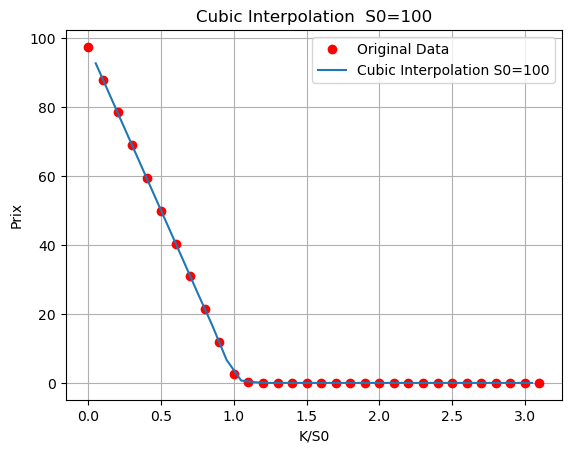

In [4]:
y_call=S0*solution_matrix2[0,:]
f = interp1d(x, y_call, kind='cubic')
x_new = [i*dx + dx/2 for i in range(nx+1)]
y_call_new = f(x_new)

# Plot original data points
plt.plot(x, y_call, 'ro', label='Original Data')

# Plot cubic interpolation
plt.plot(x_new, y_call_new, label='Cubic Interpolation S0=100')

plt.xlabel('K/S0')
plt.ylabel('Prix')
plt.title('Cubic Interpolation  S0=100')
plt.legend()
plt.grid(True)
plt.show()

## Computing the price of put options:

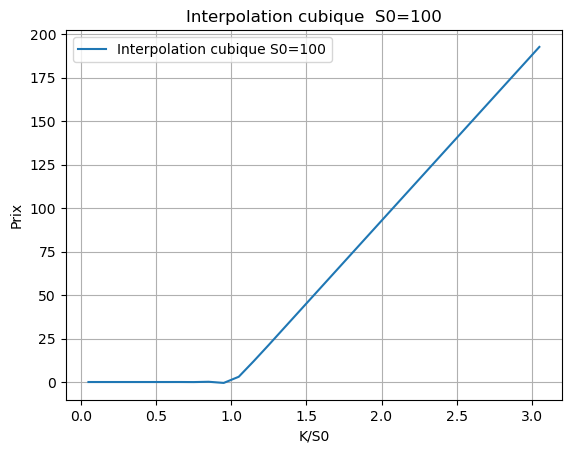

In [6]:
# Call-put parity:
def Put_option(call_price,r,K,T,S0):
    return(call_price - m.exp(-r*T)*(S0/T/r*(m.exp(r*T)-1)-K))
y_put=y_call_new
for i in range(len(y_call_new)):
    y_put[i]=Put_option(y_call_new[i],r,x_new[i]*S0,T,S0)
plt.plot(x_new, y_put, label='Interpolation cubique S0=100')

plt.xlabel('K/S0')
plt.ylabel('Prix')
plt.title('Interpolation cubique  S0=100')
plt.legend()
plt.grid(True)
plt.show()